<a href="https://colab.research.google.com/github/GabrielFFranco/Mackenzie_IA_Deep_Learning/blob/main/Tarefa_de_Aprofundamento_Trilha_8_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de Dogras com e sem Keras Tuner**
## **Aluno: Gabriel Ferreira Franco**

O dataset escolhido para atividade determina qual tipo de medicamento o paciente deve tomar baseado na sua idade, sexo, pressão arterial, nivel de colesterol e o nivel de sódio e potassio no sangue.

Dataset disponível em: https://www.kaggle.com/prathamtripathi/drug-classification

Código disponível em: https://github.com/GabrielFFranco/Mackenzie_IA_Deep_Learning/blob/main/Tarefa_de_Aprofundamento_Trilha_8_Deep_Learning.ipynb



In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 3.1 MB/s 


In [ ]:
#Fazendo as importações das bibliotecas.
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
import tensorflow as tf
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
#Carregando dataset e exibindo.
df = pd.read_csv("https://raw.githubusercontent.com/Rogerio-mack/work/main/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
#Verificando se há valores nulos.
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
#Fazendo a discretização das colunas "Sex", "BP", "Cholesterol"
coluna = ["BP", "Cholesterol"]
for col in coluna:
  dummies = pd.get_dummies(df[col], prefix=col)
  df = pd.concat([df, dummies], axis = 1)
  df.drop(columns=[col], inplace=True)
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df.head()

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,DrugY,1,0,0,1,0
1,47,1,13.093,drugC,0,1,0,1,0
2,47,1,10.114,drugC,0,1,0,1,0
3,28,0,7.798,drugX,0,0,1,1,0
4,61,0,18.043,DrugY,0,1,0,1,0


In [ ]:
#Padronizando os dados
X = scale(df.drop(columns=["Drug"]))
print(X)

[[-1.29159102 -1.040833    1.28652212 ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866  0.96076892 -0.4151454  ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866  0.96076892 -0.82855818 ... -0.64686916  0.97043679
  -0.97043679]
 ...
 [ 0.46567567  0.96076892 -0.85908883 ...  1.54590766  0.97043679
  -0.97043679]
 [-1.29159102  0.96076892 -0.28650033 ...  1.54590766 -1.03046381
   1.03046381]
 [-0.26146916 -1.040833   -0.6571702  ... -0.64686916 -1.03046381
   1.03046381]]


In [ ]:
#Fazendo a discretização dos valores alvos
y = pd.get_dummies(df["Drug"])
y.head(9)

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,0,0,1,0
8,1,0,0,0,0


In [ ]:
#Dividindo o dataset entre o conjunto de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## **Modelo de Rede Neural Manual:**
Decidi usar uma rede neural de 3 camadas ocultas, usei a função de custo 'categorical_crossentropy' por se tratar de um modelo multiclasse. A função de ativiação e o otimizador foram escolhidos aleatóriamente.

In [ ]:
#Declarando as camadas e neurônios do modelo
model = keras.Sequential([
    layers.Dense(15, activation='relu', input_shape=[8]),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='sigmoid'),
])

In [ ]:
#Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Definindo condições de parada
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

#Treinando o modelo
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.4,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0,  
)

In [ ]:
#Função auxiliar para exibir o resultado obtido
def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))
  return

,loss,accuracy,val_loss,val_accuracy
0,1.772861,0.071429,1.734444,0.089286
1,1.735063,0.071429,1.711437,0.089286
2,1.698946,0.083333,1.690301,0.107143
3,1.668004,0.119048,1.670354,0.125000
4,1.633243,0.130952,1.651536,0.160714


Best Validation Loss: 0.2864
Best Validation Accuracy: 0.9107


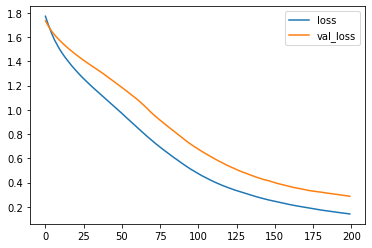

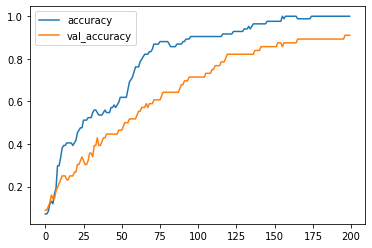

In [ ]:
display_acc_hist(history)

In [ ]:
#Testando o modelo
y_pred = np.argmax(model.predict(X_test), axis=1)
y_testing = np.argmax(y_test.values, axis=1)

#Função auxiliar para exibir os resultados do teste
def print_results(y_testing, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_testing, y_pred))
  print(classification_report(y_testing, y_pred))
  print('Acuracidade: ' , accuracy_score(y_testing, y_pred))
  return
  
print_results(y_testing, y_pred)

Matriz de Confusão: 
 [[28  2  1  1  0]
 [ 0  3  3  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 12]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.50      0.50      0.50         6
           2       0.56      0.83      0.67         6
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        12

    accuracy                           0.87        60
   macro avg       0.77      0.84      0.80        60
weighted avg       0.89      0.87      0.87        60

Acuracidade:  0.8666666666666667


# **USANDO KERAS TURNER**

In [ ]:
def model_builder(hp):

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 8-128
  hp_units_1 = hp.Int('hp_units_1', min_value=4, max_value=60, step=2)
  model = keras.Sequential(layers.Dense(units=hp_units_1, activation='relu', input_shape=[X.shape[1]]))

  # Tune the number of hidden layers 2-10 and units per layer
  for i in range(hp.Int('num_layers', 2, 8)):
   
    #model.add(Dropout(0.20))
    model.add(layers.Dense(units=hp.Int('hp_units_' + str(i),
                                            min_value=4,
                                            max_value=60,
                                            step=2),
                               activation='relu'))

  model.add(layers.Dense(5, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  
  model.compile(keras.optimizers.Adam(learning_rate=hp_learning_rate), 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='mydir',
                     project_name='mackenzie_dl_course')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, 
             batch_size=64,
             epochs=50, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 90 Complete [00h 00m 03s]
val_accuracy: 0.8571428656578064

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 20s
INFO:tensorflow:Oracle triggered exit


In [ ]:
print(f"""
The hyperparameter search is complete.

The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

print('Best layers units: \n')
for i in range(2,6):
  print('Layer: ', i-1, ' , ', best_hps.get('hp_units_' + str(i)), ' units')


The hyperparameter search is complete.

The optimal learning rate for the optimizer is 0.01.

Best layers units: 

Layer:  1  ,  20  units
Layer:  2  ,  46  units
Layer:  3  ,  50  units
Layer:  4  ,  32  units


In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train, y_train, 
                    batch_size=64,
                    epochs=50, 
                    validation_split=0.2,
                    verbose=0)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 13


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, 
               batch_size=64,
               epochs=best_epoch,
               validation_split=0.2)

Epoch 1/13
2/2 [==============================] - 1s 173ms/step - loss: 1.4838 - accuracy: 0.4821 - val_loss: 1.3261 - val_accuracy: 0.5000
Epoch 2/13
2/2 [==============================] - 0s 33ms/step - loss: 1.1215 - accuracy: 0.6250 - val_loss: 1.1182 - val_accuracy: 0.5000
Epoch 3/13
2/2 [==============================] - 0s 22ms/step - loss: 0.8568 - accuracy: 0.6518 - val_loss: 0.9173 - val_accuracy: 0.5357
Epoch 4/13
2/2 [==============================] - 0s 25ms/step - loss: 0.6684 - accuracy: 0.7054 - val_loss: 0.7196 - val_accuracy: 0.6429
Epoch 5/13
2/2 [==============================] - 0s 24ms/step - loss: 0.5021 - accuracy: 0.7768 - val_loss: 0.5420 - val_accuracy: 0.8214
Epoch 6/13
2/2 [==============================] - 0s 25ms/step - loss: 0.3531 - accuracy: 0.9107 - val_loss: 0.4548 - val_accuracy: 0.8214
Epoch 7/13
2/2 [==============================] - 0s 24ms/step - loss: 0.2458 - accuracy: 0.9643 - val_loss: 0.3790 - val_accuracy: 0.8214
Epoch 8/13
2/2 [==========

In [ ]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("\nTest loss:", eval_result[0], "\n\nTest Accuracy:", eval_result[1])

2/2 [==============================] - 0s 6ms/step - loss: 0.1459 - accuracy: 0.9333

Test loss: 0.14588579535484314 

Test Accuracy: 0.9333333373069763


In [ ]:
y_pred_ = np.argmax(model.predict(X_test), axis=-1)

y_pred = y_test*0
for i in range(len(y_pred)):
  y_pred.iloc[i,y_pred_[i]] = 1
    
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00        12

   micro avg       0.98      0.98      0.98        60
   macro avg       0.96      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60
 samples avg       0.98      0.98      0.98        60



# **Conclusão**
O Keras Tuner conseguiu encontrar um modelo que otimizou a acuracia e diminuiu a a perda. No modelo manual eu obtei por criar duas camas ocultas de 15 e 10 neurnios respectivamente, enquanto o Keras Tuner criou um modelo com 4 camadas ocultas de 20, 46, 50 e 32 neuronios respectivamente, ele também conseguiu obter um resultado menor em menos épocas em relação ao modelo manual.

No final, o modelo automatico conseguiu melhores resultados do que o modelo criado manualmente.